In [1]:
#Load data

#import packages
import pyvista as pv
import gudhi
import numpy as np
import matplotlib.pyplot as plt
import velour


from gtda.homology import WeakAlphaPersistence, VietorisRipsPersistence
from gtda.diagrams import Scaler, Filtering, PersistenceEntropy, BettiCurve, PairwiseDistance
from gtda.graphs import KNeighborsGraph, GraphGeodesicDistance



from sklearn.metrics import pairwise_distances

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot


# gtda plotting functions
from gtda.plotting import plot_heatmap

from gtda.pipeline import Pipeline
from gtda.plotting import plot_point_cloud


import pyvista as pv
import ipywidgets 
import igraph
import gudhi
import numpy as np
import matplotlib.pyplot as plt
import velour


import plotly.express as px
import pandas as pd
from sklearn.cluster import AffinityPropagation



In [2]:

PE = np.array([[9.82027879, 7.46868098, 1.2074247 ],
       [9.82275687, 7.38500095, 1.47979616],
       [9.8140593 , 7.33074124, 1.25749965],
       [9.81906141, 7.40960017, 1.63268977],
       [9.81576401, 7.50494039, 1.88439233],
       [9.81261865, 7.46265608, 1.85150513],
       [9.83508141, 7.34770496, 1.80602032],
       [9.8245328 , 7.56247448, 1.32849086],
       [9.81448857, 7.47247961, 1.52253721],
       [9.79925092, 7.31689832, 2.06688141],
       [9.80486463, 7.41738688, 2.64026878],
       [9.82180028, 7.39751705, 1.42904619],
       [9.81918856, 7.32592312, 1.58579437],
       [9.82386711, 7.38322296, 2.44156809],
       [9.82648781, 7.45809361, 1.96676235],
       [9.82342342, 7.38969619, 1.40184243],
       [9.80014728, 7.5705397 , 1.91827951],
       [9.81099179, 7.43702728, 2.37414987],
       [9.82880363, 7.47571608, 1.10212667],
       [9.78761771, 7.36716618, 1.08096558],
       [9.80955846, 7.45127795, 1.78389491],
       [9.81275515, 7.41149274, 1.43282934],
       [9.82340562, 7.31720958, 1.71617734],
       [9.8135433 , 7.40502995, 1.64600334],
       [9.83198161, 7.37043323, 1.76721218],
       [9.81719314, 7.3664142 , 1.35203565],
       [9.80491504, 7.33402976, 2.37396929],
       [9.80829648, 7.28676911, 2.31748165],
       [9.80635078, 7.39827204, 1.92831262],
       [9.81948937, 7.43166083, 1.48467639],
       [9.81642072, 7.48427329, 1.89911344],
       [9.81701039, 7.48509374, 1.50772574],
       [9.80941179, 7.47229697, 1.73163364],
       [9.80960915, 7.39754819, 2.02248911],
       [9.81604641, 7.51473486, 1.28609867],
       [9.81412409, 7.37954804, 1.33629429],
       [9.78902127, 7.36374341, 1.5741909 ],
       [9.79386298, 7.50543753, 1.70992583],
       [9.81350883, 7.45430142, 2.43433181],
       [9.81529518, 7.43277877, 1.61044578],
       [9.66299965, 7.2814351,  1.67435123],
       [8.78476469, 6.84823437, 0.35153703],
       [8.5316005,  5.30859857, 2.32816275],
       [9.5936181,  6.32616886, 1.05361311]])


In [3]:


df = pd.DataFrame(PE)
df.columns=['Entropy1', "Entropy2", "Entropy3"]


Name= []

for i in range(len(df)):
    if i == len(df)-1:
        Name.append("croissant")
    elif i == len(df)-2:
        Name.append("cylinder")
    elif i == len(df)-3:
        Name.append("sphere")
    elif i == len(df)-4:
        Name.append("Peanut")
    else:
        Name.append('Brain')

df["Names"]=Name


In [99]:

fig = px.scatter_3d(df, x='Entropy1', y='Entropy2', z='Entropy3', color=Name)
#fig.add_hline(y=0)
#fig.add_vrect(x0=0, x1=1)
fig.show()

fig= px.scatter(df, x="Entropy2", y="Entropy3", color=Name)
fig.show()


clustering = AffinityPropagation(random_state=5).fit(PE)
df["Label"] = clustering.labels_


fig= px.scatter_3d(df, x="Entropy1", y="Entropy2", z="Entropy3", color="Label")
fig.show()

fig= px.scatter(df, x="Entropy2", y="Entropy3", color="Label")
fig.show()




In [24]:
X0 = PE[:,0].tolist()
X1 = PE[:,1].tolist()
X2 = PE[:,2].tolist()

In [25]:
XX = X0+X1+X2

In [29]:
ID = []
for i in range(len(X0)):
    ID.append("Entropy_0")
for i in range(len(X0)):
    ID.append("Entropy_1")
for i in range(len(X0)):
    ID.append("Entropy_2")

In [43]:
df_s = pd.DataFrame([XX,ID])
df_s = df_s.transpose()

In [46]:
df_s.columns=['Val','ID']

In [57]:
df_s['Label'] = clustering.labels_.tolist()*3

In [58]:
df_s

,Val,ID,Label
0,9.820279,Entropy_0,0
1,9.822757,Entropy_0,2
2,9.814059,Entropy_0,0
3,9.819061,Entropy_0,3
4,9.815764,Entropy_0,4
...,...,...,...
127,1.610446,Entropy_2,3
128,1.674351,Entropy_2,3
129,0.351537,Entropy_2,5
130,2.328163,Entropy_2,6


In [64]:
I=0
PE_X=PE
X1=[]
X2=[]
X3=[]
X4=[]
X5=[]
X6=[]
X7=[]
X8=[]

for i in clustering.labels_:
    if i == 0:
        X1.append(PE_X[I].tolist())
    elif i == 1:
        X2.append(PE_X[I].tolist())
    elif i == 2:
        X3.append(PE_X[I].tolist())
    elif i == 3:
        X4.append(PE_X[I].tolist())
    elif i == 4:
        X5.append(PE_X[I].tolist())
    elif i == 5:
        X6.append(PE_X[I].tolist())
    elif i == 6:
        X7.append(PE_X[I].tolist())
    elif i == 7:
        X8.append(PE_X[I].tolist())
    I+=1
    

In [71]:
df3.transpose()

,0,1,2,3,4,5
0,9.820279,"[9.82027879, 7.46868098, 1.2074247]","[9.80486463, 7.41738688, 2.64026878]","[9.82275687, 7.38500095, 1.47979616]","[9.81906141, 7.40960017, 1.63268977]","[9.81576401, 7.50494039, 1.88439233]"
1,9.822757,"[9.8140593, 7.33074124, 1.25749965]","[9.82386711, 7.38322296, 2.44156809]","[9.81448857, 7.47247961, 1.52253721]","[9.81918856, 7.32592312, 1.58579437]","[9.81261865, 7.46265608, 1.85150513]"
2,9.814059,"[9.8245328, 7.56247448, 1.32849086]","[9.81099179, 7.43702728, 2.37414987]","[9.82180028, 7.39751705, 1.42904619]","[9.80955846, 7.45127795, 1.78389491]","[9.83508141, 7.34770496, 1.80602032]"
3,9.819061,"[9.82880363, 7.47571608, 1.10212667]","[9.80491504, 7.33402976, 2.37396929]","[9.82342342, 7.38969619, 1.40184243]","[9.82340562, 7.31720958, 1.71617734]","[9.79925092, 7.31689832, 2.06688141]"
4,9.815764,"[9.78761771, 7.36716618, 1.08096558]","[9.80829648, 7.28676911, 2.31748165]","[9.81275515, 7.41149274, 1.43282934]","[9.8135433, 7.40502995, 1.64600334]","[9.82648781, 7.45809361, 1.96676235]"
5,9.812619,"[9.81604641, 7.51473486, 1.28609867]","[9.81350883, 7.45430142, 2.43433181]","[9.81719314, 7.3664142, 1.35203565]","[9.83198161, 7.37043323, 1.76721218]","[9.80014728, 7.5705397, 1.91827951]"
6,9.835081,None,None,"[9.81948937, 7.43166083, 1.48467639]","[9.80941179, 7.47229697, 1.73163364]","[9.80635078, 7.39827204, 1.92831262]"
7,9.824533,None,None,"[9.81701039, 7.48509374, 1.50772574]","[9.78902127, 7.36374341, 1.5741909]","[9.81642072, 7.48427329, 1.89911344]"
8,9.814489,None,None,"[9.81412409, 7.37954804, 1.33629429]","[9.79386298, 7.50543753, 1.70992583]","[9.80960915, 7.39754819, 2.02248911]"
9,9.799251,None,None,None,"[9.81529518, 7.43277877, 1.61044578]",None


In [60]:
df

,Entropy1,Entropy2,Entropy3,Names,Label
0,9.820279,7.468681,1.207425,Brain,0
1,9.822757,7.385001,1.479796,Brain,2
2,9.814059,7.330741,1.257500,Brain,0
3,9.819061,7.409600,1.632690,Brain,3
4,9.815764,7.504940,1.884392,Brain,4
5,9.812619,7.462656,1.851505,Brain,4
6,9.835081,7.347705,1.806020,Brain,4
7,9.824533,7.562474,1.328491,Brain,0
8,9.814489,7.472480,1.522537,Brain,2
9,9.799251,7.316898,2.066881,Brain,4


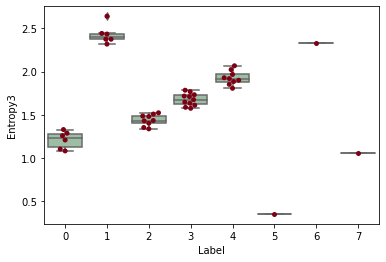

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Label', y='Entropy3', data=df, color='#99c2a2')
ax = sns.swarmplot(x='Label', y='Entropy3', data=df, color='#7d0013')
plt.show()

In [85]:
X1

[[9.82027879, 7.46868098, 1.2074247],
 [9.8140593, 7.33074124, 1.25749965],
 [9.8245328, 7.56247448, 1.32849086],
 [9.82880363, 7.47571608, 1.10212667],
 [9.78761771, 7.36716618, 1.08096558],
 [9.81604641, 7.51473486, 1.28609867]]

In [90]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(np.array(X1)[:,2], np.array(X2)[:,2], np.array(X3)[:,2], np.array(X4)[:,2], np.array(X5)[:,2])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Entropy3 ~ C(Label)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)


202.6350698697123 3.7729611285954904e-24


,sum_sq,df,F,PR(>F)
C(Label),8.349029,7.0,169.438221,1.354359e-25
Residual,0.253413,36.0,NaN,NaN


In [76]:

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df, res_var='Entropy3', anova_model='Entropy3 ~ C(Label)')
res.anova_summary


# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

,df,sum_sq,mean_sq,F,PR(>F)
C(Label),7.0,8.349029,1.192718,169.438221,1.354359e-25
Residual,36.0,0.253413,0.007039,NaN,NaN


In [77]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df, res_var='Entropy3', xfac_var='Label', anova_model='Entropy3 ~ C(Label)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0,2,0.228097,0.085915,0.370279,7.294958,0.001000
1,0,3,0.465231,0.328317,0.602145,15.451403,0.001000
2,0,4,0.716650,0.574468,0.858832,22.919750,0.001000
3,0,1,1.219861,1.064108,1.375613,35.614147,0.001000
4,0,5,0.858897,0.567511,1.150284,13.403542,0.001000
5,0,6,1.117728,0.826342,1.409115,17.442736,0.001000
6,0,7,0.156821,-0.134565,0.448208,2.447278,0.647841
7,2,3,0.237134,0.115881,0.358387,8.892993,0.001000
8,2,4,0.488553,0.361381,0.615724,17.469049,0.001000
9,2,1,0.991763,0.849581,1.133946,31.718385,0.001000


/Users/skumar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



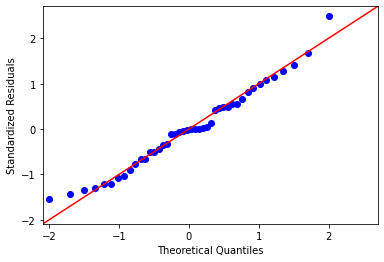

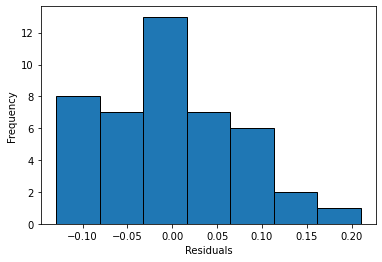

In [78]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [79]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9764307141304016 0.49752387404441833


In [91]:
import scipy.stats as stats
w, pvalue = stats.bartlett(np.array(X1)[:,2], np.array(X2)[:,2], np.array(X3)[:,2], np.array(X4)[:,2], np.array(X5)[:,2])
print(w, pvalue)



2.498677489832356 0.6448726245264724


In [92]:

# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the bartlett's test
from bioinfokit.analys import stat 
res = stat()
res.bartlett(df=df, res_var='Entropy3', xfac_var='Label')
res.bartlett_summary

/Users/skumar/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/skumar/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning:

invalid value encountered in double_scalars

/Users/skumar/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2468: RuntimeWarning:

divide by zero encountered in true_divide



,Parameter,Value
0,Test statistics (T),NaN
1,Degrees of freedom (Df),7.0
2,p value,NaN


In [126]:
df_pe = pd.read_excel('/Users/skumar/Documents/PhD/BrainAnalysis/Brain_analysis/PE_df.xlsx')

In [142]:
df_pe.isna()

,Line,Gender,Entropy_0,Entropy_1,Entropy_2
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [136]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_pe, res_var='Entropy_2', anova_model='Entropy_2 ~ C(Gender)*C(Line)')
res.anova_summary


# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

/Users/skumar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning:

divide by zero encountered in double_scalars



ValueError: array must not contain infs or NaNs

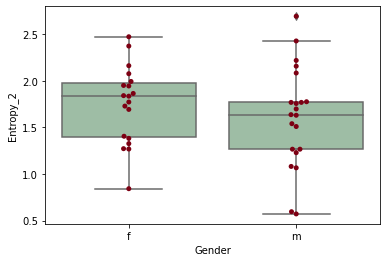

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Gender', y='Entropy_2', data=df_pe, color='#99c2a2')
ax = sns.swarmplot(x='Gender', y='Entropy_2', data=df_pe, color='#7d0013')
plt.show()

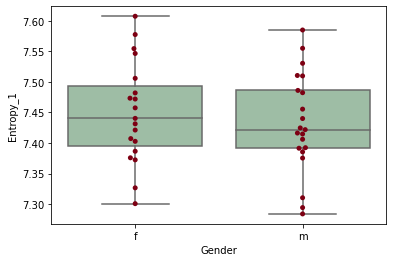

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Gender', y='Entropy_1', data=df_pe, color='#99c2a2')
ax = sns.swarmplot(x='Gender', y='Entropy_1', data=df_pe, color='#7d0013')
plt.show()

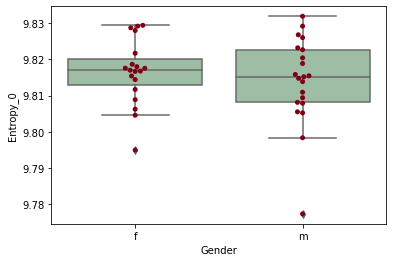

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Gender', y='Entropy_0', data=df_pe, color='#99c2a2')
ax = sns.swarmplot(x='Gender', y='Entropy_0', data=df_pe, color='#7d0013')
plt.show()

In [121]:

fig = px.scatter_3d(df_pe, x='Entropy_0', y='Entropy_1', z='Entropy_2', color='Gender')
#fig.add_hline(y=0)
#fig.add_vrect(x0=0, x1=1)
fig.show()

In [ ]:
from statsmodels.stats.api import anova_lm

table1 = anova_lm(lm, interX_lm)
print(table1)

interM_lm = ols("S ~ X + C(E)*C(M)", data=salary_table).fit()
print(interM_lm.summary())

table2 = anova_lm(lm, interM_lm)
print(table2)